# **Covariance and correlation of random variables**

by Felix Fritzen (fritzen@simtech.uni-stuttgart.de)

additional material for the course _Data processing for engineers and scientists_ at the University of Stuttgart


## **Objective**
Illustrate the meaning of the covariance and of the correlation by means of examples.

## **Outline**
- generate random values that are correlated/uncorrelated and illustrate the implication of different values of the correlation
- show that random variables that are uncorrelated can still be dependent


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd
#import time
#from matplotlib.widgets import Slider

## Data generation and computations

$$X \in \mathcal{U} ([-1, 1])$$
$$Y \in \mathcal{U} ([-1, 1])$$
$$Z = a \, X + b + \mathcal{N}(0, c)$$

In [4]:
n_sample = 1000
X = rnd.uniform(-1, 1, size=n_sample)
Y = rnd.uniform(-1, 1, size=n_sample)
a = rnd.uniform(0.5, 2, size=1)
b = rnd.uniform(-1, 1, size=1)
c = 0.05
# correlated RV (plus noise)
Z = a*X + b + rnd.normal( loc=0, scale=0.15, size=n_sample )

EX= X.sum()/n_sample
VX= ((X-EX)**2).sum() / (n_sample-1)
EY= Y.sum()/n_sample
VY= ((Y-EY)**2).sum() / (n_sample-1)
EZ= Z.sum()/n_sample
VZ= ((Z-EZ)**2).sum() / (n_sample-1)
EXY= (X*Y).sum()/n_sample
EXZ= (X*Z).sum()/n_sample

# The covariance:
CXY= EXY-EX*EY
CorXY=CXY/np.sqrt(VX*VY)
CXZ= EXZ-EX*EZ
CorXZ=CXZ/np.sqrt(VX*VZ)
print('a = %8.4f,   b = %8.4f,   c = %8.4f' % ( a, b, c ) )
print('Cov(X,Y)  =  %12.4f      Cor(X,Y)  =  %12.8f' % ( CXY, CorXY) )
print('Cov(X,Z)  =  %12.4f      Cor(X,Z)  =  %12.8f' % ( CXZ, CorXZ) )

a =   1.0386,   b =  -0.5969,   c =   0.0500
Cov(X,Y)  =       -0.0019      Cor(X,Y)  =   -0.00581360
Cov(X,Z)  =        0.3547      Cor(X,Z)  =    0.96953008


Text(0, 0.5, 'Z')

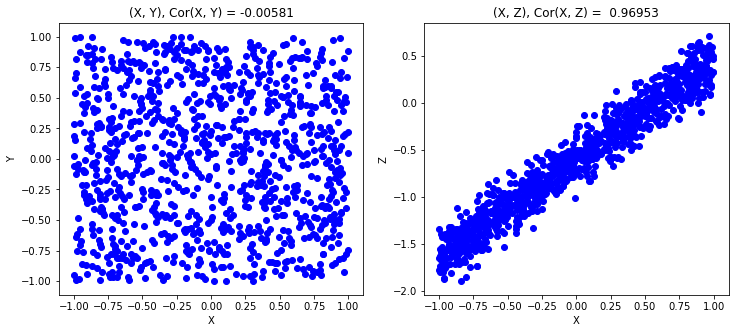

In [5]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].scatter( X, Y, color='blue')
ax[0].set_title('(X, Y), Cor(X, Y) = %8.5f' % CorXY)

ax[1].scatter( X, Z, color='blue')
ax[1].set_title('(X, Z), Cor(X, Z) = %8.5f' % CorXZ)

ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')

ax[1].set_xlabel('X')
ax[1].set_ylabel('Z')


## Example: Uncorrelated variables can be dependent

Let $X, Y$ random variables with
$$ X = \sin( \xi ), \qquad Y = \cos(\xi), \qquad \xi \sim \mathcal{U}([-\pi,\pi]) $$

Clearly, $X, Y$ are not independent as they are both described by a single intrinsic coordinate $\xi$. However, we have
$$ E(X) = \frac{1}{2\pi} \intop_{-\pi}^\pi \sin(\xi) \mathrm{d} \xi = 0$$
$$ E(Y) = \frac{1}{2\pi} \intop_{-\pi}^\pi \cos(\xi) \mathrm{d} \xi = 0$$
$$ E(XY) = \frac{1}{2\pi} \intop_{-\pi}^\pi \cos(\xi) \sin(\xi) \mathrm{d} \xi = \frac{1}{4\pi} \intop_{-\pi}^{\pi} \sin(2\xi) \, \mathrm{d} \xi = 0$$
$$ C(X,Y) = E(X) E(Y) - C(X,Y) = 0 = Cor(X,Y)$$

Therefore, this example shows that uncorrelated variables can still be dependent (but not *linearly* dependent)

Cov(X,Y)  =        0.0000      Cor(X,Y)  =    0.00000000


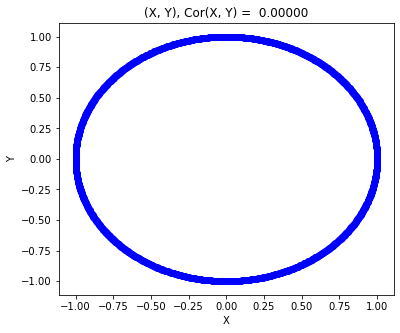

In [6]:
xi= np.linspace(-np.pi, np.pi, n_sample)
xi= xi[:-1] + (xi[1]-xi[0])*0.5
X = np.sin(xi)
Y = np.cos(xi)
EX= X.sum()/n_sample
VX= ((X-EX)**2).sum() / (n_sample-1)
EY= Y.sum()/n_sample
VY= ((Y-EY)**2).sum() / (n_sample-1)
EXY= (X*Y).sum()/n_sample

# The covariance:
CXY= EXY-EX*EY
CorXY=CXY/np.sqrt(VX*VY)

fig, ax = plt.subplots(1,1,figsize=(6,5))
ax.scatter( X, Y, color='blue')
ax.set_title('(X, Y), Cor(X, Y) = %8.5f' % CorXY)
ax.set_xlabel('X')
ax.set_ylabel('Y')

print('Cov(X,Y)  =  %12.4f      Cor(X,Y)  =  %12.8f' % ( CXY, CorXY) )

